X_train shape: (3013, 10, 1)
X_val shape: (754, 10, 1)
X_test shape: (942, 10, 1)
Epoch 1/50


c:\Users\satvi\Documents\Study\SEMESTER - VI\CSET369 - Time Series\Project\CryptoPricePediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.8263e-04 - val_loss: 7.4979e-04
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3783e-05 - val_loss: 7.9047e-04
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4274e-05 - val_loss: 7.1486e-04
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8276e-05 - val_loss: 8.1830e-04
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1755e-05 - val_loss: 6.3967e-04
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3547e-05 - val_loss: 6.3412e-04
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1677e-05 - val_loss: 6.6125e-04
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5136e-05 - val_loss: 5.9490e-04
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7006e-05 - val_loss: 5.7946e-04
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0037e-05 - val_loss: 5.7412e-04
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3136e-05 - val_loss: 5.4419e-

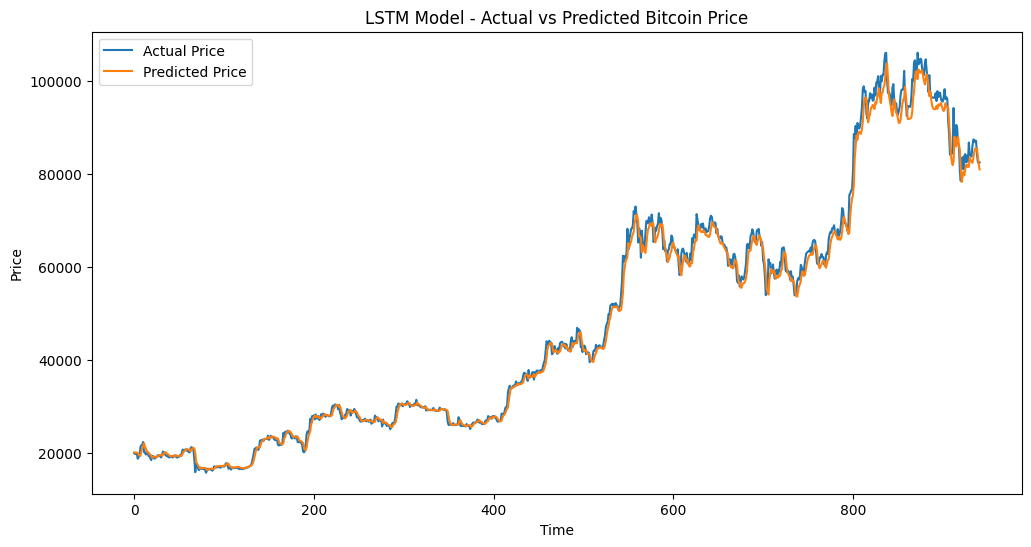


✅ LSTM Model training, evaluation, and saving completed!


In [2]:
# 📢 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import sys
sys.path.append('../src')
from data_preprocessing import prepare_model_data
from utils import save_fig

# 📢 2. Load Processed Data
# Use your features CSV
data = pd.read_csv('../data/processed/btc_features.csv')


# LSTM


# 📢 3. Prepare Sequences for LSTM
seq_length = 10  # You can experiment with different sequence lengths
model_data = prepare_model_data(data, seq_length=seq_length)

X_train = model_data['X_train']
y_train = model_data['y_train']
X_val = model_data['X_val']
y_val = model_data['y_val']
X_test = model_data['X_test']
y_test = model_data['y_test']
scaler = model_data['scaler']

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

# 📢 4. Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# 📢 5. Train the Model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_val, y_val),
                    verbose=1)

# 📢 6. Evaluate on Test Set
y_pred_scaled = model.predict(X_test)

# Inverse transform predictions and y_test back to original price scale
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# 📢 7. Metrics Calculation
mae = mean_absolute_error(y_test_true, y_pred)
mse = mean_squared_error(y_test_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_true, y_pred)

print("\n📋 LSTM Model Evaluation Metrics:")
print(f"   MAE: {mae:.4f}")
print(f"   MSE: {mse:.4f}")
print(f"   RMSE: {rmse:.4f}")
print(f"   R²: {r2:.4f}")

# 📢 8. Plot Predictions
plt.figure(figsize=(12,6))
plt.plot(y_test_true, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('LSTM Model - Actual vs Predicted Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
save_fig("LSTM_Actual_vs_Predicted")
plt.show()

# 📢 9. Save Predictions
results = pd.DataFrame({
    'Actual_Price': y_test_true.flatten(),
    'Predicted_Price': y_pred.flatten()
})
results.to_csv('../outputs/metrics/LSTM_predictions.csv', index=False)

# 📢 10. Save the model (Optional for later deployment)
model.save('../models/lstm_model.keras')

print("\n✅ LSTM Model training, evaluation, and saving completed!")


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 10, 100)        │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,301 (317.58 KB)

 Trainable params: 81,301 (317.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 4.7295e-04 - val_loss: 8.8151e-04
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.1538e-05 - val_loss: 0.0010
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.2355e-05 - val_loss: 6.9047e-04
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0542e-05 - val_loss: 0.0011
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.1016e-05 - val_loss: 5.4714e-04
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3476e-05 - val_loss: 0.0011
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5662e-05 - val_loss: 5.6377e-04
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1620e-05 - val_loss: 0.0012
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8503e-05 - val_loss: 8.2601e-04
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.9939e-05 - val_loss: 0.0018
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0955e-05 - val_loss: 0.0015
Epoch 12/

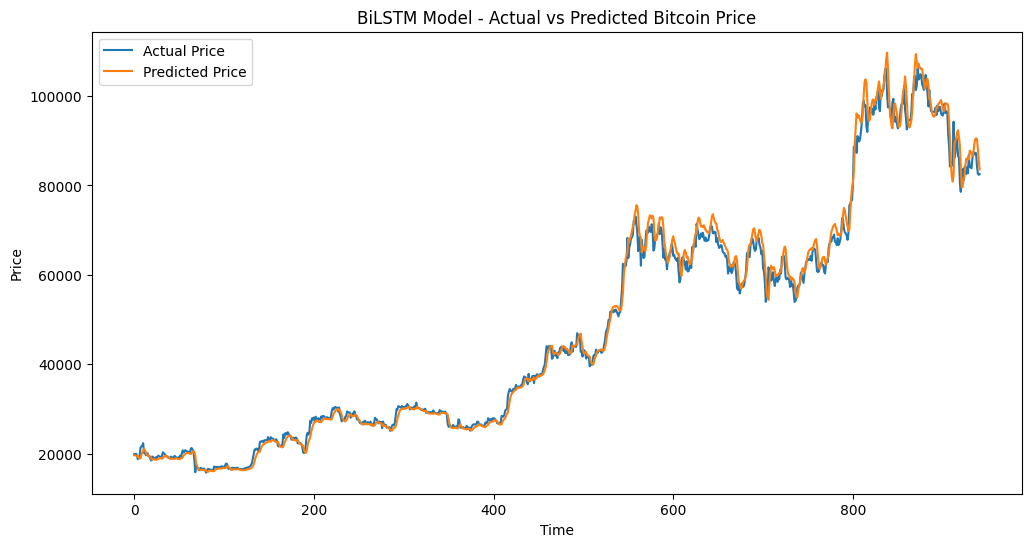


✅ BiLSTM Model training, evaluation, and saving completed!


In [ ]:
# BiLSTM


from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
bilstm_model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    Bidirectional(LSTM(50)),
    Dense(1)
])

# Compile the model
bilstm_model.compile(optimizer='adam', loss='mse')

# Show model summary
bilstm_model.summary()

# ---------------------------
# 📢 Training BiLSTM Model
# ---------------------------

early_stopping_bilstm = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_bilstm = bilstm_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping_bilstm],
    verbose=1
)

# ---------------------------
# 📈 Evaluate BiLSTM Model
# ---------------------------

print("\n📢 Evaluating BiLSTM Model...")

y_pred_bilstm = bilstm_model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_bilstm = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_bilstm_inv = scaler.inverse_transform(y_pred_bilstm)

# Calculate evaluation metrics
mae_bilstm = mean_absolute_error(y_test_bilstm, y_pred_bilstm_inv)
mse_bilstm = mean_squared_error(y_test_bilstm, y_pred_bilstm_inv)
rmse_bilstm = np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test_bilstm, y_pred_bilstm_inv)

print(f"📋 BiLSTM Evaluation Metrics:")
print(f"   MAE: {mae_bilstm:.4f}")
print(f"   MSE: {mse_bilstm:.4f}")
print(f"   RMSE: {rmse_bilstm:.4f}")
print(f"   R^2: {r2_bilstm:.4f}")

plt.figure(figsize=(12,6))
plt.plot(y_test_true, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('BiLSTM Model - Actual vs Predicted Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
save_fig("BiLSTM_Actual_vs_Predicted")
plt.show()

results = pd.DataFrame({
    'Actual_Price': y_test_true.flatten(),
    'Predicted_Price': y_pred.flatten()
})
results.to_csv('../outputs/metrics/BiLSTM_predictions.csv', index=False)

model.save('../models/bilstm_model.keras')

print("\n✅ BiLSTM Model training, evaluation, and saving completed!")